## **Importamos los librerías necesarias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import seaborn as sns
import statsmodels.api as sm
from tqdm import tqdm

tqdm.pandas()
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# **Ejemplo de una normal, la importancia del muestreo**


In [2]:
a = np.random.normal(0, 1, 100)

In [3]:
def generateNormal(mu, sigma, size):
  a = np.random.normal(mu, sigma, size)
  plt.hist(a, density=True)

  x = np.linspace((-(sigma*3) + mu), sigma*3 + mu, 100)
  y = norm.pdf(x, mu, sigma)
  plt.plot(x,y, color='orangered',linewidth=3)

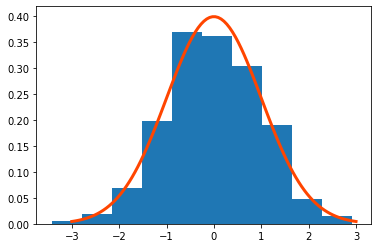

In [4]:
generateNormal(0, 1, 1000)

# **La multicolinealidad**

In [5]:
vector_base = np.array([5,8])

In [6]:
vector_base

array([5, 8])

## Ejemplo 1: Baja multicolinearidad

In [7]:
vector_independiente = np.array([-24, 17])

In [8]:
vector_independiente

array([-24,  17])

In [9]:
matriz1 = np.column_stack((vector_base, vector_independiente))

In [10]:
matriz1

array([[  5, -24],
       [  8,  17]])

In [11]:
np.linalg.inv(matriz1)

array([[ 0.06137184,  0.0866426 ],
       [-0.02888087,  0.01805054]])

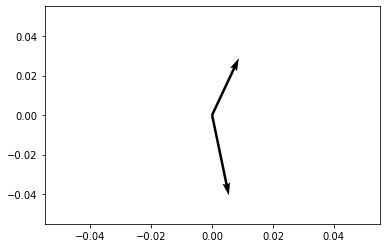

In [12]:
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, matriz1[:,0], matriz1[:,1], scale=100,)
plt.show()

## Ejemplo 2: Ortogonalidad

In [13]:
vector_ortogonal = np.array([-10, 6.25])

In [14]:
vector_ortogonal

array([-10.  ,   6.25])

In [15]:
matriz_ortogonal = np.column_stack((vector_base, vector_ortogonal))

In [16]:
matriz_ortogonal

array([[  5.  , -10.  ],
       [  8.  ,   6.25]])

In [17]:
np.linalg.inv(matriz_ortogonal)

array([[ 0.05617978,  0.08988764],
       [-0.07191011,  0.04494382]])

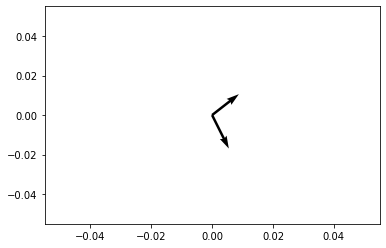

In [18]:
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, matriz_ortogonal[:,0], matriz_ortogonal[:,1], scale=100,)
plt.show()

## Ejemplo 3: Alta multicolinearidad

In [19]:
vector_dependiente = np.array([10, 15])

In [20]:
vector_dependiente

array([10, 15])

In [21]:
matriz2 = np.column_stack((vector_base, vector_dependiente))

In [22]:
matriz2

array([[ 5, 10],
       [ 8, 15]])

In [23]:
np.linalg.inv(matriz2)

array([[-3. ,  2. ],
       [ 1.6, -1. ]])

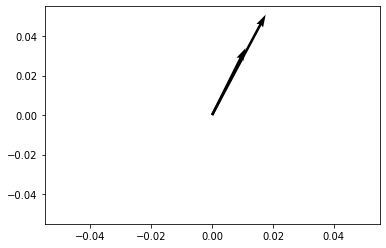

In [24]:
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, matriz2[:,0], matriz2[:,1], scale=50,)
plt.show()

## Ejemplo 4: Multicolinearidad perfecta

In [25]:
vector_dependiente_perfecto = np.array([10, 16])

In [26]:
vector_dependiente_perfecto

array([10, 16])

In [27]:
matriz3 = np.column_stack((vector_base, vector_dependiente_perfecto))

In [28]:
matriz3

array([[ 5, 10],
       [ 8, 16]])

In [29]:
np.linalg.inv(matriz3)

LinAlgError: ignored

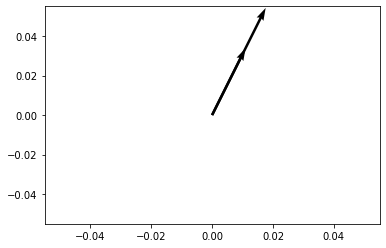

In [30]:
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, matriz3[:,0], matriz3[:,1], scale=50,)
plt.show()

# **Regresiónes**

## Ejemplo vinos

In [31]:
data = pd.read_csv('winequality-red.csv')

In [32]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
variables = list(data.columns)

In [34]:
variables

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [35]:
variables.remove('quality')

In [36]:
variables

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [37]:
predictores = sm.add_constant(data[variables], prepend=True)

In [38]:
predictores.head()

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [39]:
mod = sm.OLS(data['quality'], predictores)

In [40]:
res = mod.fit()

In [41]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.79e-145
Time:                        20:46:48   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

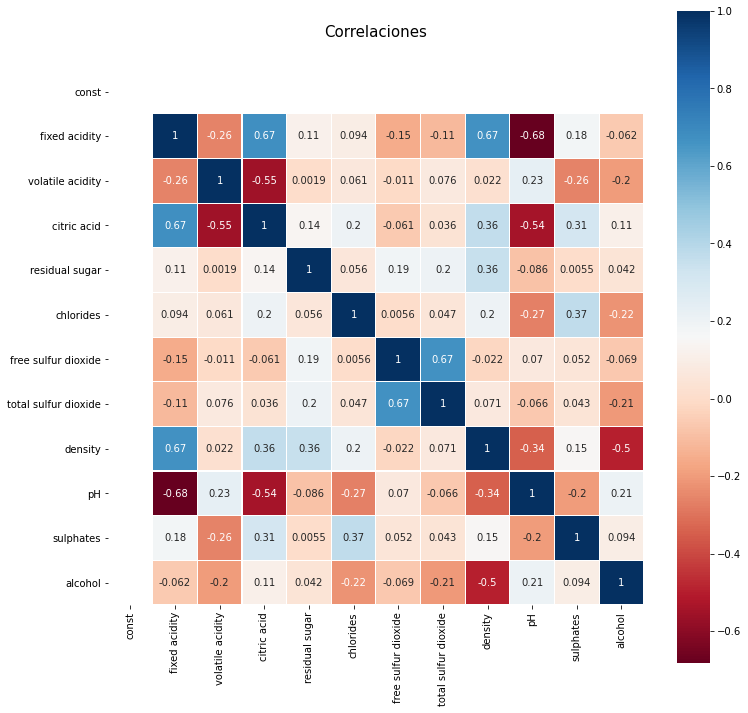

In [42]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Correlaciones', y=1.05, size=15)
sns.heatmap(predictores.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

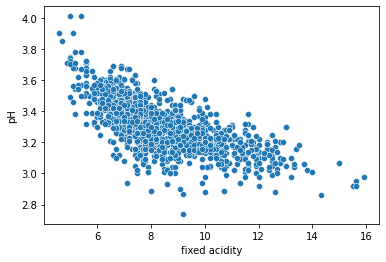

In [43]:
sns.scatterplot(data=data, x='fixed acidity', y='pH')

[Ejemplo de código en R](https://www.kaggle.com/couyang/wine-eda-dt-rf-xgb-lightgbm-svm-and-h2o)

[Ejemplo de código en Python](https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine)

## Ejemplo teórico

Vamos a definir una ecuación que actúe como el modelo poblacional. Con esta generaremos unos datos y apartir de estos haremos un muestreo aleatorio. Veremos entonces qué sucede en varios casos.

La ecuación poblacional será: salario = b0 + b1 * educación + b2 * experiencia + b3 * sexo + b4 * habilidad innata + b5 * actitud, y definiremos los coeficientes de la manera:

1. b0 = 1,000,000
2. b1 = 200,00
3. b2 = 500,000
4. b3 = hombres ganan 100,000 más
4. b4 = 250,000
5. b5 = 50,000

Por facilidad, trataremos todos los coeficientes sobre 1 millón. Es decir, b0 queda igual a 1, b2 igual a 0.2, b3 igual a 0.5, etc


In [74]:
educacion = list(np.random.normal(8, 3, 1000000))
experiencia = list(np.random.normal(12, 8, 1000000))
sexo = list(np.random.randint(0, 2, 1000000))
habilidad = list(np.random.normal(0, 1, 1000000))
actitud = list(np.random.normal(0, 1, 1000000))

In [75]:
df = pd.DataFrame(list(zip(educacion, experiencia, sexo, habilidad, actitud)),
                  columns = ['educacion', 'experiencia', 'sexo', 'habilidad', 'actitud'])

In [76]:
df['const'] = 1

In [77]:
df.head()

,educacion,experiencia,sexo,habilidad,actitud,const
0,6.295951,4.872665,1,1.604110,0.211519,1
1,8.632577,8.438485,0,-0.029435,-0.896610,1
2,6.063743,19.943338,0,0.711999,-0.521510,1
3,7.616010,14.506506,0,-0.373787,0.434597,1
4,12.537118,11.772794,0,-0.883852,-1.757583,1


In [78]:
df['salario'] = df.progress_apply(lambda df: 1 + 
                                             0.2*df.educacion + 
                                             0.5*df.experiencia + 
                                             0.1*df.sexo + 
                                             0.25*df.habilidad + 
                                             0.05*df.actitud, axis=1)

100%|██████████| 1000000/1000000 [00:48<00:00, 20748.31it/s]


In [144]:
df['proxy_habilidad'] = df['educacion'].apply(lambda x: x + random.random())
df['proxy_actitud'] = df['experiencia'].apply(lambda x: x + random.random())

In [145]:
df.head()

,educacion,experiencia,sexo,habilidad,actitud,const,salario,proxy_habilidad,proxy_actitud
0,6.295951,4.872665,1,1.604110,0.211519,1,5.207126,7.272255,5.085044
1,8.632577,8.438485,0,-0.029435,-0.896610,1,6.893569,9.417635,8.762044
2,6.063743,19.943338,0,0.711999,-0.521510,1,12.336342,6.535120,20.429431
3,7.616010,14.506506,0,-0.373787,0.434597,1,9.704738,8.254521,15.067274
4,12.537118,11.772794,0,-0.883852,-1.757583,1,9.084978,13.239935,12.550082


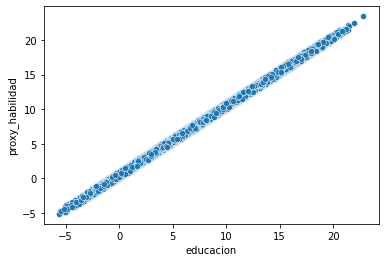

In [146]:
sns.scatterplot(data=df, x='educacion', y='proxy_habilidad')

In [147]:
df.shape

(1000000, 9)

In [158]:
df_sample = df.sample(frac=0.01).reset_index(drop=True)

In [161]:
df_sample.shape

(10000, 9)

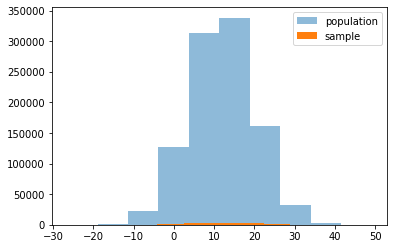

In [159]:
variable = 'experiencia'

plt.hist(df[variable], alpha=0.5, label='population')
plt.hist(df_sample[variable], label='sample')
plt.legend(loc='upper right')
plt.show()

In [160]:
df_sample.head()

,educacion,experiencia,sexo,habilidad,actitud,const,salario,proxy_habilidad,proxy_actitud
0,12.337982,11.582713,1,-0.828469,1.781367,1,9.240904,12.590556,12.577358
1,8.187274,4.184570,0,-0.733159,-1.042108,1,4.494345,8.603876,4.366320
2,7.099435,1.835249,0,1.356478,1.794440,1,3.766353,7.535699,2.117974
3,8.955929,18.132508,0,-2.000166,0.594313,1,11.387114,9.809661,18.852573
4,8.960819,17.898390,1,0.741653,-0.452027,1,12.004171,9.365154,18.549420


In [162]:
mod = sm.OLS(df_sample['salario'], df_sample[['educacion', 'experiencia', 'sexo', 'habilidad', 'actitud', 'const']])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.628e+33
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        21:19:41   Log-Likelihood:             3.2246e+05
No. Observations:               10000   AIC:                        -6.449e+05
Df Residuals:                    9994   BIC:                        -6.449e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
educacion       0.2000   7.96e-18   2.51e+16      

In [163]:
mod = sm.OLS(df_sample['salario'], df_sample[['educacion', 'experiencia', 'sexo', 'const']])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 8.307e+05
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        21:19:44   Log-Likelihood:                -494.75
No. Observations:               10000   AIC:                             997.5
Df Residuals:                    9996   BIC:                             1026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
educacion       0.1999      0.001    236.772      

In [164]:
mod = sm.OLS(df_sample['salario'], df_sample[['educacion', 'experiencia', 'sexo', 'proxy_habilidad', 'proxy_actitud', 'const']])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 4.985e+05
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        21:19:56   Log-Likelihood:                -492.92
No. Observations:               10000   AIC:                             997.8
Df Residuals:                    9994   BIC:                             1041.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
educacion           0.2116      0.009     

In [165]:
mod = sm.OLS(df_sample['salario'], df_sample[['sexo', 'const']])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.879
Date:                Wed, 05 May 2021   Prob (F-statistic):             0.0272
Time:                        21:20:05   Log-Likelihood:                -28106.
No. Observations:               10000   AIC:                         5.622e+04
Df Residuals:                    9998   BIC:                         5.623e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sexo           0.1777      0.080      2.209      0.0

In [171]:
errores_educacion = []
errores_experiencia = []
errores_sexo = []

for i in [0.1, 0.01, 0.001, 0.0001, 0.00001]:
  df_sample = df.copy().sample(frac=i).reset_index(drop=True)
  mod = sm.OLS(df_sample['salario'], df_sample[['educacion', 'experiencia', 'sexo', 'const']])
  res = mod.fit()
  errores_educacion.append(dict(res.bse)['educacion'])
  errores_experiencia.append(dict(res.bse)['experiencia'])
  errores_sexo.append(dict(res.bse)['sexo'])

In [172]:
errores_educacion

[0.00026860775858215784,
 0.0008564706413387604,
 0.002633797772540174,
 0.01052738459856882,
 0.01146306855077954]

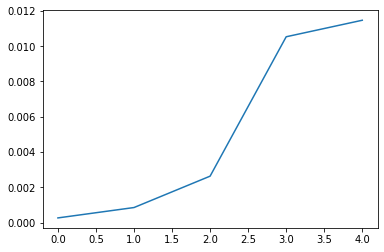

In [173]:
plt.plot(errores_educacion)

In [174]:
errores_experiencia

[0.0001010570331400699,
 0.0003168823335072561,
 0.0010436144329267964,
 0.0030542720981850875,
 0.004751009936633221]

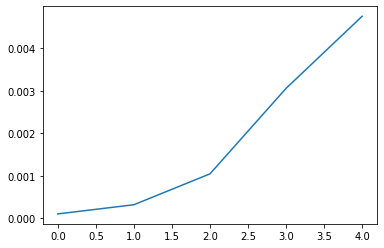

In [175]:
plt.plot(errores_experiencia)

In [176]:
errores_sexo

[0.0016138378102362229,
 0.005113225654749338,
 0.016392766076948916,
 0.05028730861246889,
 0.06938362098907007]

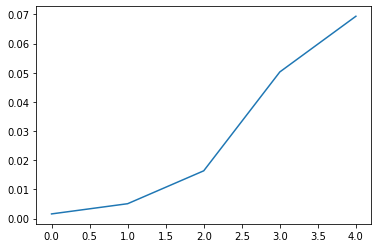

In [177]:
plt.plot(errores_sexo)

In [178]:
beta_educacion = []
beta_experiencia = []
beta_sexo = []

for i in range(0, 10):
  df_sample = df.copy().sample(frac=0.01).reset_index(drop=True)
  mod = sm.OLS(df_sample['salario'], df_sample[['educacion', 'experiencia', 'sexo', 'const']])
  res = mod.fit()
  beta_educacion.append(dict(res.params)['educacion'])
  beta_experiencia.append(dict(res.params)['experiencia'])
  beta_sexo.append(dict(res.params)['sexo'])

In [179]:
beta_educacion

[0.19839652198774346,
 0.1992682833214796,
 0.19990972925855943,
 0.19819455214058446,
 0.1999667385445008,
 0.19941365253128615,
 0.20128673947065898,
 0.20056915116375726,
 0.1993254556898497,
 0.20017882124083153]

In [180]:
np.mean(beta_educacion)

0.19965096453492512

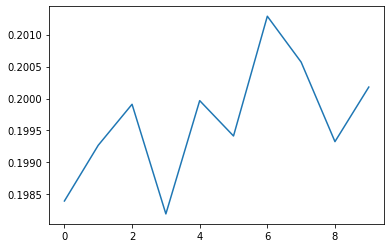

In [181]:
plt.plot(beta_educacion)